In [24]:
import pandas as pd
df = pd.read_csv("Student_performance_10k.csv")
df

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,associate's degree,1.0,1.0,70,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,some high school,1.0,0.0,87,60.0,100.0,89.0,336.0,A


In [25]:
print(pd.options.display.max_rows)

60


In [26]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
print(f"Average math score : {df['math_score'].mean():.2f}")
print(f"Average reading score : {df['reading_score'].mean():.2f}")
print(f"Average writing score : {df['writing_score'].mean():.2f}")

Average math score : 57.18
Average reading score : 70.13
Average writing score : 71.42


In [28]:
print(df[['math_score',"reading_score","writing_score"]].agg(['min','max','median']))

        math_score  reading_score  writing_score
min            0.0           17.0           10.0
max          100.0          100.0          100.0
median        58.0           71.0           72.5


In [29]:
toppers = df[(df['math_score']>90) & (df['reading_score']>90) & (df['writing_score']>90)]
percentage = (len(toppers)/len(df)) * 100
print(f"Percentage of students who scored above 90 in all three subjects: {percentage:.2f}%")

Percentage of students who scored above 90 in all three subjects: 0.15%


In [30]:
fail = df[(df['math_score']<40) | (df['reading_score']<40) | (df['writing_score']<40)]
print(len(fail),"students failed in at least one subject")

3152 students failed in at least one subject


In [31]:
avg_marks = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
top_index = avg_marks.idxmax()
top_student = df.loc[top_index]
print("Student with hihgest average marks is\n",top_student)

Student with hihgest average marks is
 roll_no                                 std-6718
gender                                    female
race_ethnicity                           group D
parental_level_of_education    bachelor's degree
lunch                                        1.0
test_preparation_course                      0.0
math_score                                 100.0
reading_score                              100.0
writing_score                              100.0
science_score                               54.0
total_score                                354.0
grade                                          A
Name: 6717, dtype: object


In [32]:
male_stud = df[df['gender'] == 'male']
female_stud = df[df['gender'] == 'female']
male_stud_avg = ((male_stud['math_score'] + male_stud['reading_score'] + male_stud['writing_score']) / 3).mean()
female_stud_avg = ((female_stud['math_score'] + female_stud['reading_score'] + female_stud['writing_score']) / 3).mean()

print(f"Average marks of male students = {male_stud_avg:.2f}")
print(f"Average marks of female students = {female_stud_avg:.2f}")

if female_stud_avg > male_stud_avg:
  print("Female students perform better on average than male students.")
elif male_stud_avg > female_stud_avg:
  print("Male students perform better on average than female students.")
else:
  print("Both perform equally on average.")

Average marks of male students = 63.01
Average marks of female students = 69.47
Female students perform better on average than male students.


In [33]:
df = df.drop(columns=['parental_level_of_education'])
df

,roll_no,gender,race_ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,1.0,0.0,78.0,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,1.0,0.0,37.0,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,1.0,1.0,70.0,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,1.0,0.0,87.0,60.0,100.0,89.0,336.0,A


In [34]:
df = df.drop(columns = ['test_preparation_course'])
df

,roll_no,gender,race_ethnicity,lunch,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,1.0,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,1.0,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,1.0,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,1.0,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,0.0,26.0,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,1.0,78.0,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,1.0,37.0,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,1.0,70.0,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,1.0,87.0,60.0,100.0,89.0,336.0,A


## **Histogram**

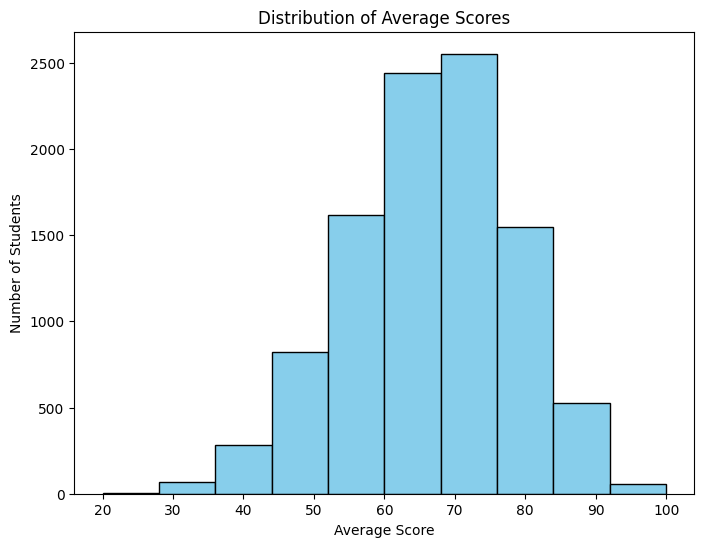

In [37]:
import matplotlib.pyplot as plt
df['avg_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
plt.figure(figsize=(8,6))
plt.hist(df["avg_score"],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Average Scores")
plt.show()

## **Bar chart**

['male' nan 'Boy' '\\tmale' 'female' 'Girl']


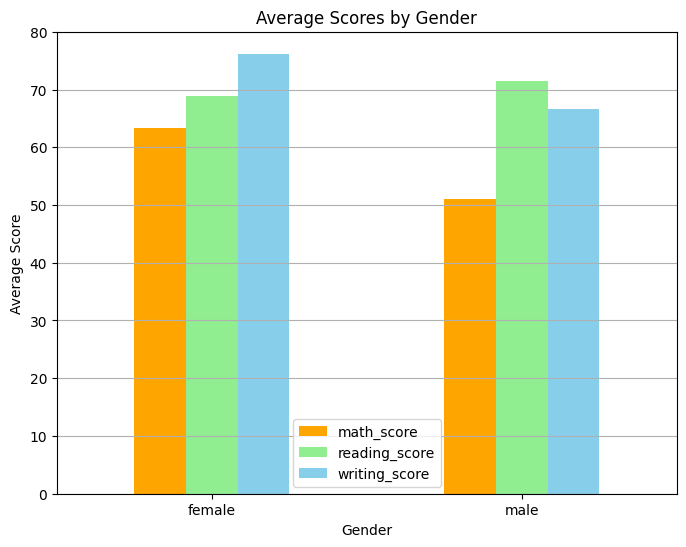

In [38]:
print(df['gender'].unique())
df['gender'] = df['gender'].replace({
   'Boy' : 'male',
   'Girl' : 'female',
   '\\tmale' : 'male',
})
df_filter_gender = df[df['gender'].isin(['male','female'])]
avg_by_gender = df_filter_gender.groupby('gender')[['math_score','reading_score','writing_score']].mean()
avg_by_gender.plot(kind='bar',figsize = (8,6),color=['orange','lightgreen','skyblue'])
plt.title("Average Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(axis ='y')
plt.show()

## **Line chart**

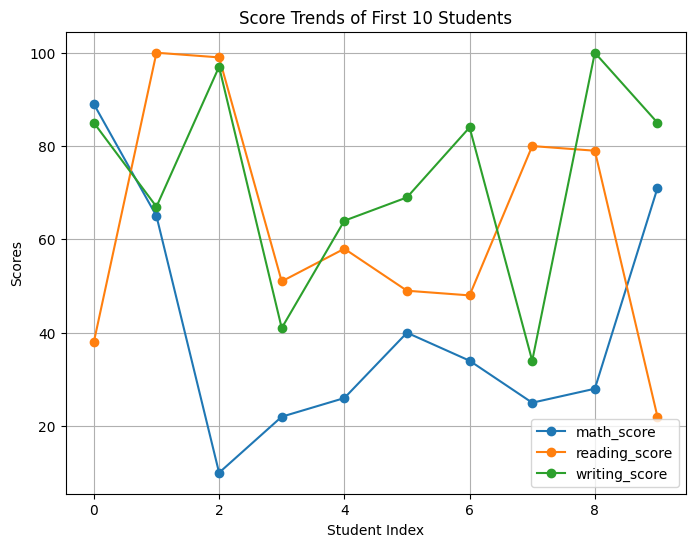

In [39]:
df[['math_score', 'reading_score', 'writing_score']].head(10).plot(kind='line',marker = "o",figsize=(8,6))
plt.title("Score Trends of First 10 Students")
plt.xlabel("Student Index")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

## **Scatter Plot**

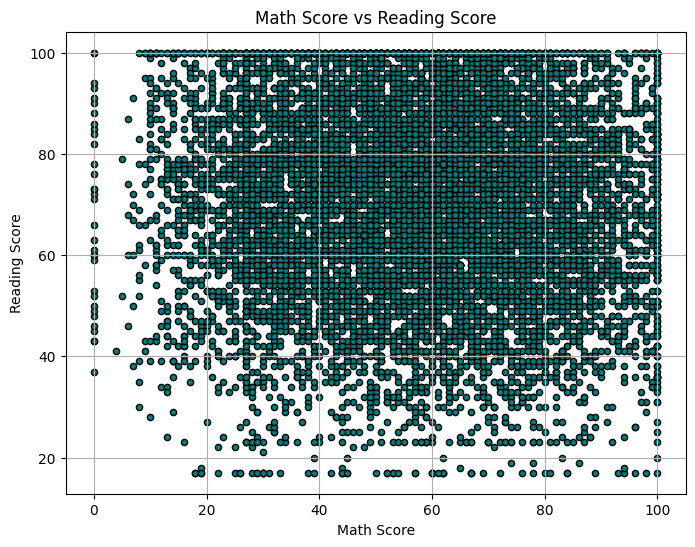

In [40]:
df.plot(kind='scatter', x='math_score', y='reading_score', color='teal', edgecolor = 'black',figsize=(8,6))
plt.title("Math Score vs Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.grid(True)
plt.show()

## **Pie chart**

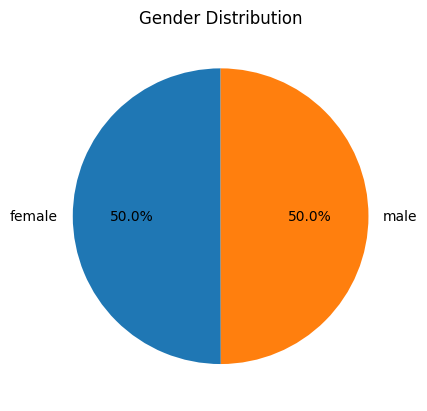

In [41]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()